# **IMPORT DATASET**

In [13]:
from google.colab import files


uploaded = files.upload()


Saving Medical Price Dataset.csv to Medical Price Dataset.csv


# **IMPORT LIBRARIES**

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

# **SAMPLING THE DATA**

In [26]:
df = pd.read_csv(io.BytesIO(uploaded['Medical Price Dataset.csv']))

In [ ]:
 #Display the first five observations
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **PREPROCESSING DATA**

In [27]:
# Describe the dataset-round till two floating points
df.describe().round(2)

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


In [29]:
# Check for the dtypes & nulls
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [30]:
#Checking if there is any null fields
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [31]:
# Getting the numerical columns first
df.describe().columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [32]:
# Separating numerical and categorical data
df_num = df[['age','bmi','children','charges']]
df_cat = df[['sex','smoker','region']]

In [33]:
# Converting the categorical data into numeric data.
# One hot enconding the categorical data
df1 = pd.get_dummies(df_cat)
df1


,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,0,1,1,0,0,1,0,0
1334,1,0,1,0,1,0,0,0
1335,1,0,1,0,0,0,1,0
1336,1,0,1,0,0,0,0,1


In [34]:
# Concatenating the categorical and numerical data to form our data set.
data = pd.concat([df_num,df1], axis=1)
data

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


# **Exploratory Data Analysis**

In [35]:
# Finding out the correlation between the features
data.corr()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.046371,-0.003750,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.057292,-0.787251,0.787251,0.006349,-0.039905,0.073982,-0.043210
sex_female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184
sex_male,-0.020856,0.046371,0.017163,0.057292,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184
smoker_no,0.025019,-0.003750,-0.007673,-0.787251,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945
smoker_yes,-0.025019,0.003750,0.007673,0.787251,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945
region_northeast,0.002475,-0.138156,-0.022808,0.006349,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829


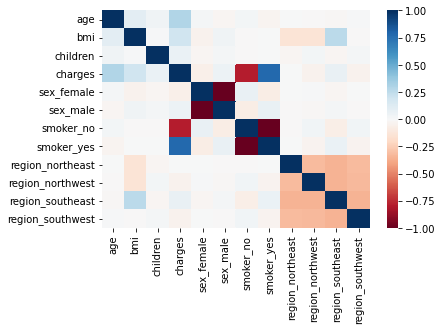

In [36]:
# Heatmap to show correlation
sns.heatmap(data.corr(), cmap='RdBu')


In [37]:
# Correlation between charges and the other features.
data.corr()['charges'].sort_values()

smoker_no          -0.787251
sex_female         -0.057292
region_southwest   -0.043210
region_northwest   -0.039905
region_northeast    0.006349
sex_male            0.057292
children            0.067998
region_southeast    0.073982
bmi                 0.198341
age                 0.299008
smoker_yes          0.787251
charges             1.000000
Name: charges, dtype: float64

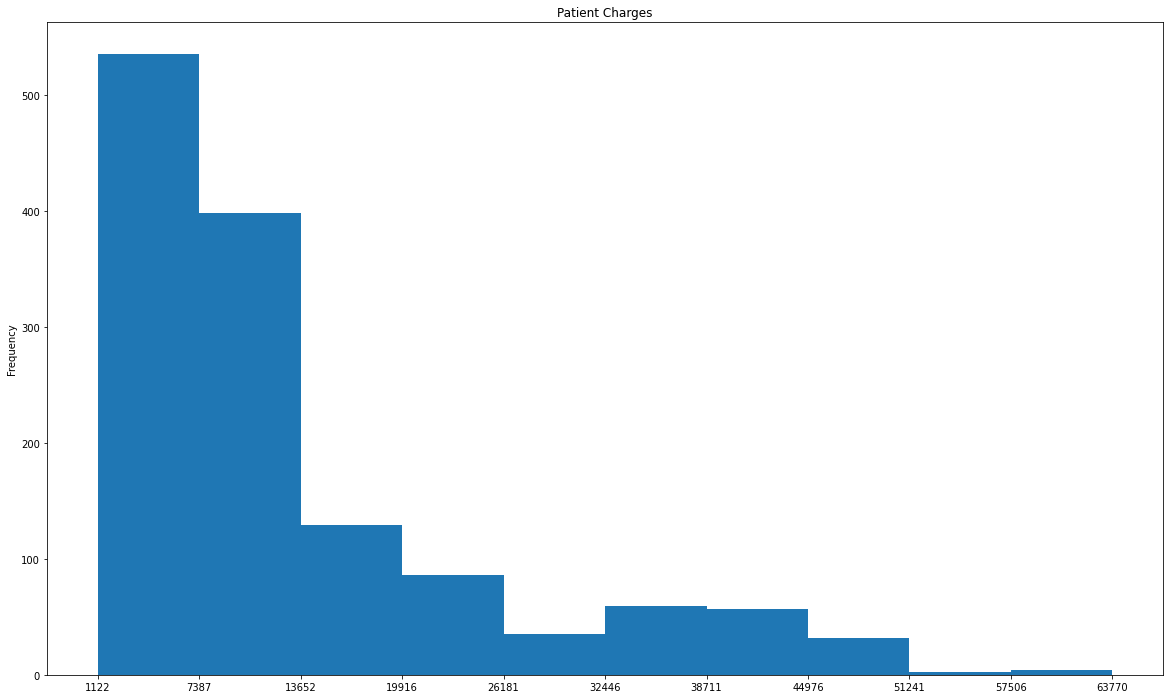

In [38]:
# Graph showing the min and maximum charges
count, bin_edges = np.histogram(data['charges'])
data['charges'].plot(kind='hist', xticks=bin_edges, figsize=(20,12))
plt.title("Patient Charges")
plt.show()

# **MODELLING**

In [39]:
# collecting x & y

X = data['bmi'].values
Y = data['charges'].values

# calculate mean of x & y using an inbuilt numpy method mean()
mean_x = np.mean(X)
mean_y = np.mean(Y)

In [40]:
# total no.of input values
m = len(X)

# using the formula to calculate m & c
numer = 0
denom = 0
for i in range(m):
  numer += (X[i] - mean_x) * (Y[i] - mean_y)
  denom += (X[i] - mean_x) ** 2
m = numer / denom
c = mean_y - (m * mean_x)

print (f'm = {m} \nc = {c}')

m = 393.87303079739496 
c = 1192.937208961157


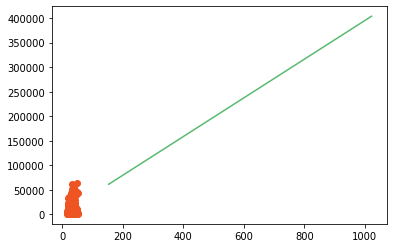

In [41]:
# plotting values and regression line
max_x = np.max(X) + 100
min_x = np.min(Y) - 100

# calculating line values x and y
x = np.linspace (min_x, max_x, 100)
y = c + m * x

plt.plot(x, y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, c='#ef5423', label='data points')

In [ ]:

# calculating R-squared value for measuring goodness of our model. 

ss_t = 0 #total sum of squares
ss_r = 0 #total sum of square of residuals

for i in range(int(data.x.count())): # val_count represents the no.of input x values
  y_pred = c + m * X[i]
  ss_t += (Y[i] - mean_y) ** 2
  ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)

print(r2)